In [3]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 1.1 MB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 1.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=4777ddb833cb8fd1525e618553bc80769e7148d6a7be8dbecc576009e2edcec4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking

   ---------------------------------------- 0/5 [peewee]
   ---------------------------------------- 0/5 [peewee]
   ---------------

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [4]:
ticker = "AMZN"
start_date = "2014-01-01"
end_date = "2024-01-01"

In [5]:
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2014-01-02,19.898500,19.9680,19.701000,19.940001,42756000
2014-01-03,19.822001,20.1355,19.811001,19.914499,44204000
2014-01-06,19.681499,19.8500,19.421000,19.792500,63412000
2014-01-07,19.901501,19.9235,19.714500,19.752001,38320000
2014-01-08,20.096001,20.1500,19.802000,19.923500,46330000


In [7]:
df.shape

(2516, 5)

In [8]:
df.isnull().sum()

Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,84.406266,85.413021,83.363118,84.434228,8.022116e+07
std,51.398466,52.071345,50.746889,51.437184,4.163082e+07
min,14.347500,14.521000,14.200000,14.220000,1.762600e+07
25%,36.370999,36.494500,36.015750,36.323750,5.386500e+07
50%,86.808502,87.657497,85.709000,86.938747,6.881015e+07
75%,127.122501,129.012505,125.325003,127.365000,9.288400e+07
max,186.570496,188.654007,184.839493,187.199997,4.771220e+08


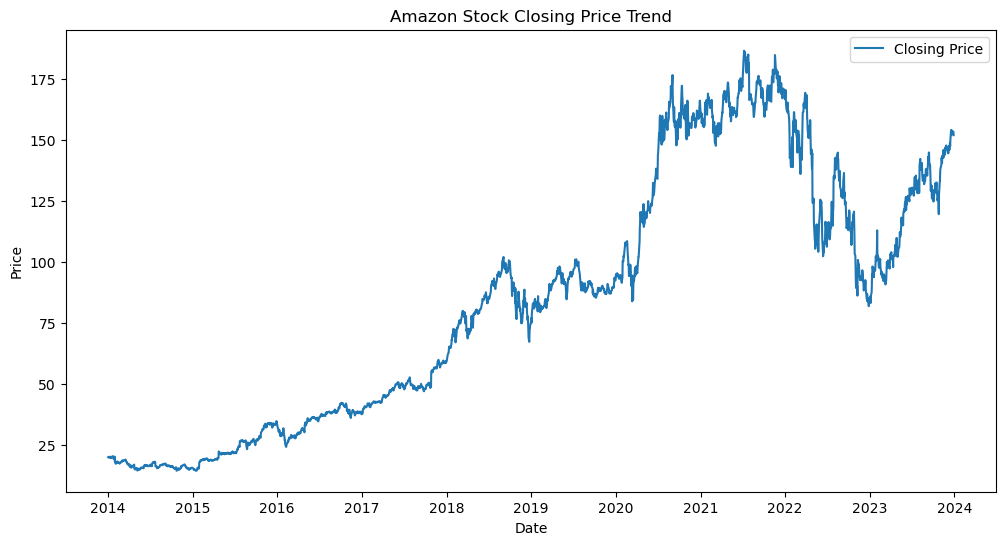

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Amazon Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()


In [12]:
df['Daily_Return'] = df['Close'].pct_change()


In [13]:
df.dropna(inplace=True)

In [14]:
features = ['Close', 'MA20', 'MA50', 'Daily_Return', 'Volume']
X = df[features]

In [15]:
y = df['Close'].shift(-1)

In [16]:
# Remove last row (because target is NaN)
X = X[:-1]
y = y[:-1]


In [17]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)


In [18]:
train_size = int(len(X_scaled) * 0.8)

X_train = X_scaled[:train_size]
X_test = X_scaled[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)


In [20]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


E:\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-" * 40)


In [22]:
evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest")


Linear Regression Performance:
MAE: 2.407261491258518
RMSE: 3.334121328616492
R2 Score: 0.9753156275878424
----------------------------------------
Random Forest Performance:
MAE: 8.293083179952644
RMSE: 11.787835198674193
R2 Score: 0.6914486851074911
----------------------------------------


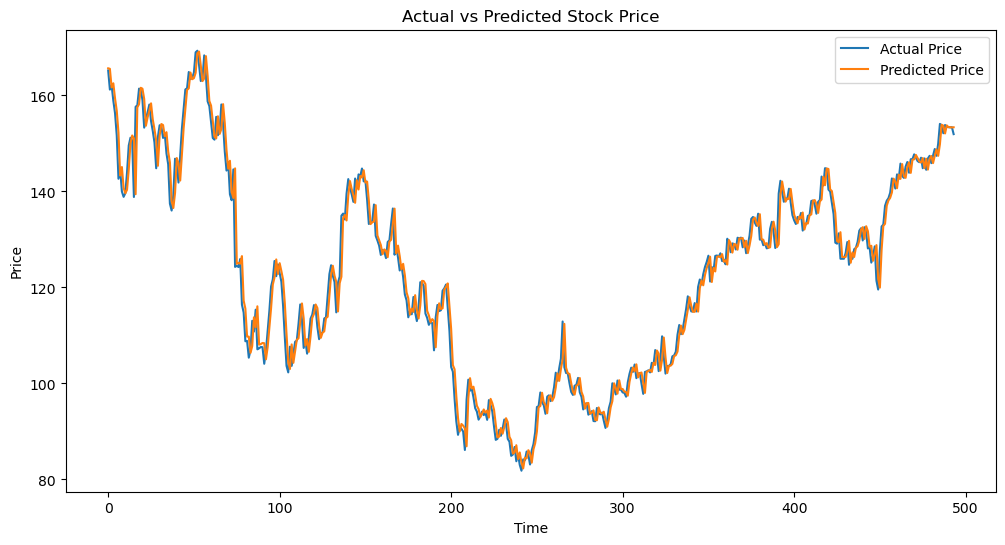

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(lr_predictions, label='Predicted Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


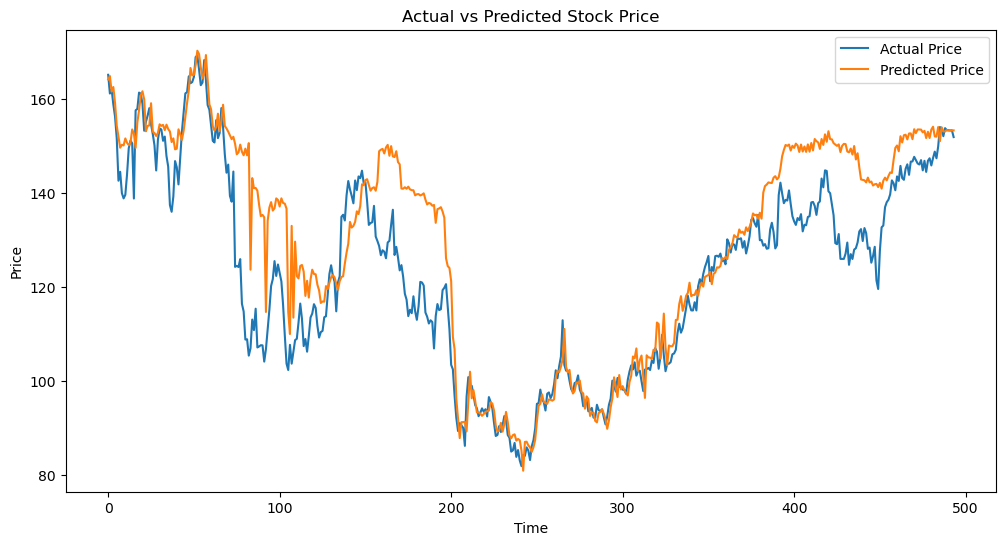

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(rf_predictions, label='Predicted Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()